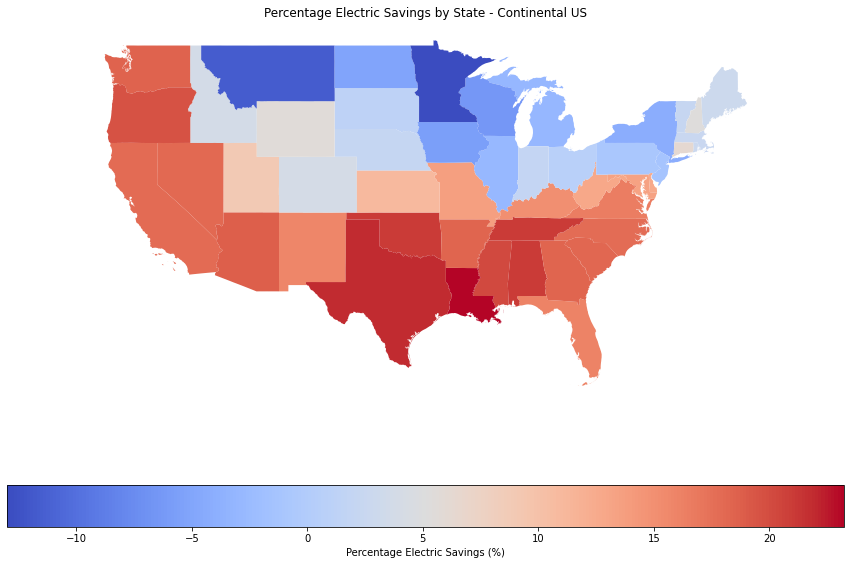

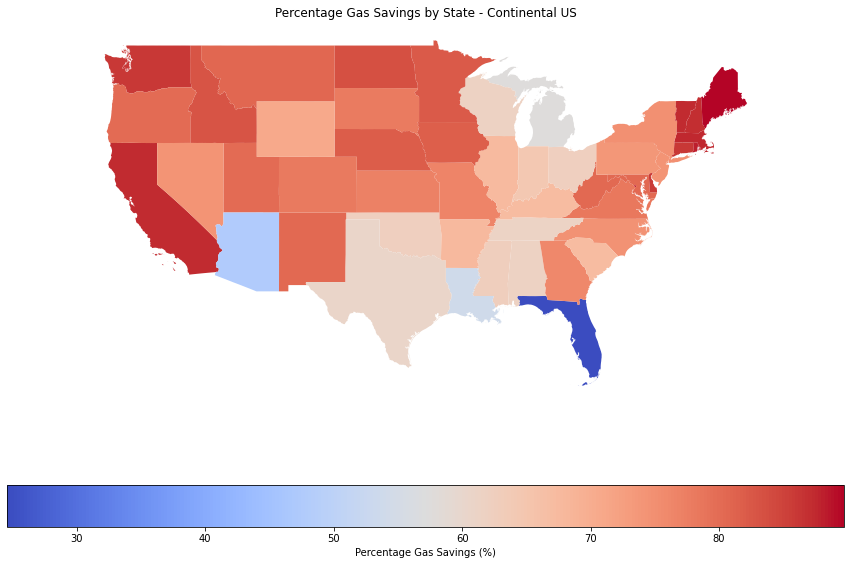

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the U.S. States Shapefile
gdf_states = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

# Load the savings DataFrame
savings_df = pd.read_csv('17_SmallOffice_savings.csv')

# Merge GeoDataFrame with savings_df based on state abbreviations
gdf_merged = gdf_states.merge(savings_df, left_on='STUSPS', right_on='state')

# Filter out non-continental states (Alaska, Hawaii, and territories)
gdf_continental = gdf_merged[~gdf_merged['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS'])]

# Plotting perc_elec_savings
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_continental.plot(column='perc_elec_savings', ax=ax, legend=True, cmap='coolwarm',
                     legend_kwds={'label': 'Percentage Electric Savings (%)',
                                  'orientation': "horizontal"})
ax.set_title('Percentage Electric Savings by State - Continental US')
ax.set_axis_off()  # Remove axis and tick labels
plt.show()

# Plotting perc_gas_savings
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_continental.plot(column='perc_gas_savings', ax=ax, legend=True, cmap='coolwarm',
                     legend_kwds={'label': 'Percentage Gas Savings (%)',
                                  'orientation': "horizontal"})
ax.set_title('Percentage Gas Savings by State - Continental US')
ax.set_axis_off()  # Remove axis and tick labels
plt.show()
